In [93]:
import pandas as pd
import matplotlib.pyplot as plt

In [94]:
tweets = pd.read_csv('tweets.csv')

In [95]:
display(tweets.head())
tweets.shape

,user_name,text,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source
0,John Nosta,"The Second Big Bang. Thoughts on #AI, the #di...",07945,I'm a technology theorist driving innovation a...,2009-01-29 14:00:16+00:00,74459.0,53009.0,39233,True,2022-12-29 21:04:08+00:00,"['AI', 'digitaltwin', 'technology', 'GPT3', 'C...",Twitter Web App
1,Garret K,"Made a ""mock Turing test"" for #ChatGPT. You ju...",NaN,NaN,2022-12-29 08:20:55+00:00,1.0,9.0,0,False,2022-12-29 21:04:06+00:00,['ChatGPT'],Twitter Web App
2,Dhimaar,Looks like Chatgpt is stuck in 2021 😀 Not read...,NaN,NaN,2010-12-07 04:34:50+00:00,0.0,26.0,3,False,2022-12-29 21:03:25+00:00,"['ChatGPT', 'Messi', 'Ronaldo']",Twitter for iPhone
3,Mr Beast || Dogemaniac,@ChatGPT_ERC20 @carl305555411 @Ritesh_Trades @...,NaN,"Dogememer || Space, Mars ✨️ Elon Musk 💖 Follow...",2020-08-03 22:12:07+00:00,545.0,501.0,2488,False,2022-12-29 21:01:44+00:00,"['ChatGPT', 'AI']",Twitter for Android
4,Syed Mehdi Raza,#AI changed people's lifestyles by providing a...,Canada,Civil Engineer | Manager Projects | Systems Th...,2010-09-10 19:00:29+00:00,303.0,465.0,91,False,2022-12-29 21:00:49+00:00,['AI'],LinkedIn


(56764, 12)

In [96]:
# Drop duplicates and NaN
tweets.drop_duplicates(inplace=True)
tweets.dropna(inplace=True)
tweets.shape

(33672, 12)

### Verified users

In [115]:
# Percentage of tweets that are verified
percentage_of_tweets = tweets['user_verified'].value_counts(normalize=True) * 100
print(percentage_of_tweets)

False    96.635187
True      3.364813
Name: user_verified, dtype: float64


In [116]:
# Tweets that are verified
tweets_verified = tweets[tweets['user_verified'] == 'True']
display(tweets_verified.head())
print(tweets_verified.shape)

,user_name,text,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source
0,John Nosta,"The Second Big Bang. Thoughts on #AI, the #di...",07945,I'm a technology theorist driving innovation a...,2009-01-29 14:00:16+00:00,74459.0,53009.0,39233,True,2022-12-29 21:04:08+00:00,"ai, digitaltwin, technology, gpt3, chatgpt",Twitter Web App
74,Patrick Seitz,A guide to CES 2023 written by the ChatGPT art...,"Vienna, Va.","Senior writer for Investor's Business Daily, @...",2013-06-25 16:31:42+00:00,5314.0,1688.0,204,True,2022-12-29 20:12:25+00:00,ces2023,Twitter Web App
100,John Nosta,Humanity’s Four Truths in the Era of Technolog...,07945,I'm a technology theorist driving innovation a...,2009-01-29 14:00:16+00:00,74459.0,53009.0,39233,True,2022-12-29 19:58:11+00:00,"ai, technology, aristotle, gpt3, chatgpt",Twitter Web App
101,Kristi Hines,@Google Comparing search results and #ChatGPT ...,"Phoenix, AZ",Editor @sejournal and content creator. Views e...,2008-08-11 23:17:45+00:00,46701.0,406.0,2190,True,2022-12-29 19:56:42+00:00,chatgpt,Twitter for iPhone
229,John Nosta,Will ChatGPT Kill the Student Essay? #AI #Cha...,07945,I'm a technology theorist driving innovation a...,2009-01-29 14:00:16+00:00,74459.0,53009.0,39233,True,2022-12-29 18:39:06+00:00,"ai, chatgpt, gpt3, education",Twitter for iPhone


(1133, 12)


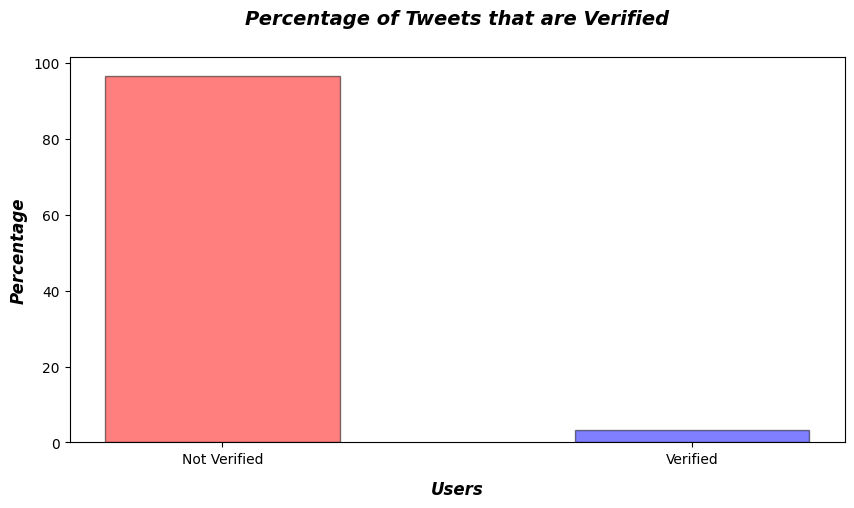

In [143]:
# Plot the percentage of tweets that are verified
plt.figure(figsize=(10, 5), dpi=100, facecolor='w', edgecolor='k')
# Title and labels of the plot
plt.bar(percentage_of_tweets.index, percentage_of_tweets.values, color=['red', 'blue'], alpha=0.5, width=0.5, edgecolor='black', linewidth=1, tick_label=['Not Verified', 'Verified'], align='center', label='Percentage of Tweets', log=False, orientation='vertical', linestyle='-', antialiased=True)
plt.title('Percentage of Tweets that are Verified', fontsize=14, fontweight='bold', color='black', loc='center', pad=10, y=1.05, style='italic')
plt.ylabel('Percentage', fontsize=12, fontweight='bold', color='black', linespacing=2, rotation_mode='anchor', style='italic')
plt.xlabel('Users', fontsize=12, fontweight='bold', color='black', labelpad=10, linespacing=2, style='italic')
# Display the plot
plt.show()

## Source of tweet

In [100]:
# 10 most common sources of tweets
source = tweets['source'].value_counts(normalize=True).head(10) * 100
for index, value in source.items():
    print(f'{index:<30}{value:.2f}%')

Twitter Web App               51.19%
Twitter for iPhone            21.78%
Twitter for Android           15.26%
TweetDeck                     1.74%
Twitter for iPad              1.36%
LinkedIn                      1.27%
Buffer                        1.03%
Twitter for Mac               0.82%
Hootsuite Inc.                0.56%
Semrush Social Media Tool     0.46%


## Hashtags

In [101]:
# Clean hashtags
tweets['hashtags'] = tweets['hashtags'].str.strip("[]").str.replace("'", "").str.lower()
# Merging all hashtags into one list
tweets_hashtags = tweets['hashtags'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

In [102]:
# Hashtags in tweets
hashtags = tweets_hashtags.value_counts(normalize=True).head(10) * 100

In [104]:
# Users with the most tweets
users = tweets['user_name'].value_counts(normalize=True).head(5) * 100
# Most common users
for index, value in users.items():
    print(f'{index:<50}{value:.2f}%')

Richard Geldreich                                 0.56%
Lucio Giolli                                      0.50%
Cybersécurité, IA, Metavers, Cryptomonnaies       0.42%
@tomruen@mathstodon.xyz                           0.20%
Woodu                                             0.18%
